In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(23)

Pierwsze spojrzenie na dane

In [3]:
houses_df = pd.read_csv("HousePriceIndia.csv")

In [4]:
houses_df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [5]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [6]:
houses_df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


Podział na klasy

In [7]:
target_variable = "Price"
houses_df["Price"].describe()


count    1.462000e+04
mean     5.389322e+05
std      3.675324e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Price, dtype: float64

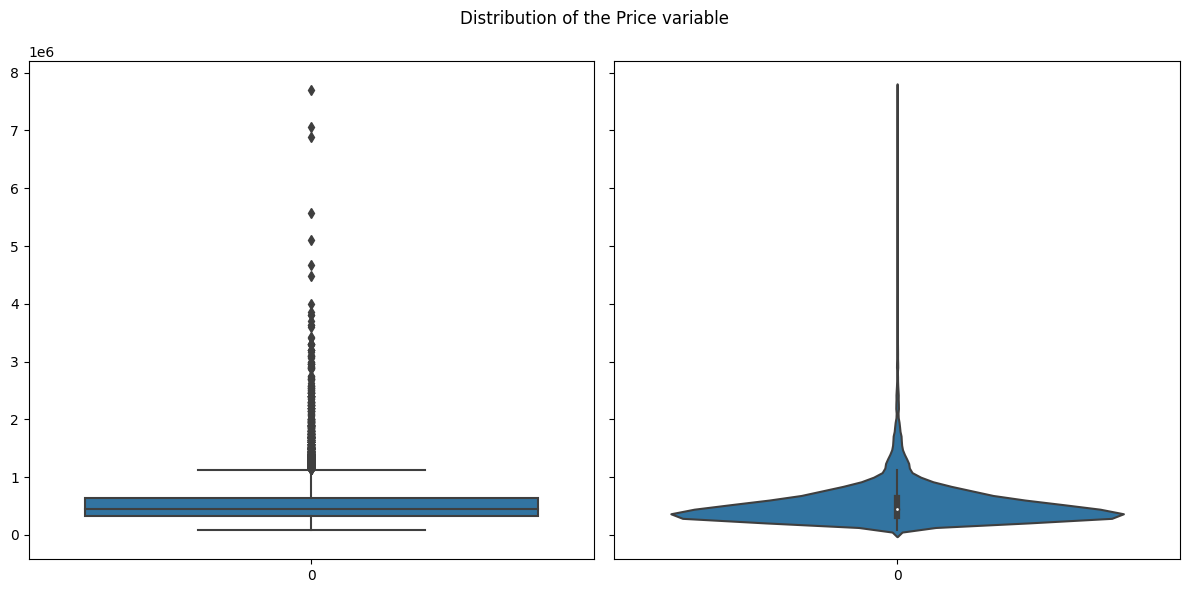

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.suptitle("Distribution of the Price variable")

sns.boxplot(data=houses_df["Price"], ax=axes[0])
sns.violinplot(data=houses_df["Price"], ax=axes[1])

plt.tight_layout()
plt.show()

In [58]:
prices = houses_df["Price"]

q1 = np.percentile(prices, 25)
q3 = np.percentile(prices, 75)

iqr = q3 - q1
print(f"iqr: {iqr}")


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"lower bound: {lower_bound}")
print(f"upper bound: {upper_bound}")

iqr: 325000.0
lower bound: -167500.0
upper bound: 1132500.0


In [60]:
lower_bound = max(0, lower_bound)

In [61]:
threshold1 = lower_bound + (upper_bound - lower_bound) / 3
threshold2 = lower_bound + (upper_bound - lower_bound) / 3 * 2

print(f"threshold 1: {threshold1}")
print(f"threshold 2: {threshold2}")

threshold 1: 377500.0
threshold 2: 755000.0


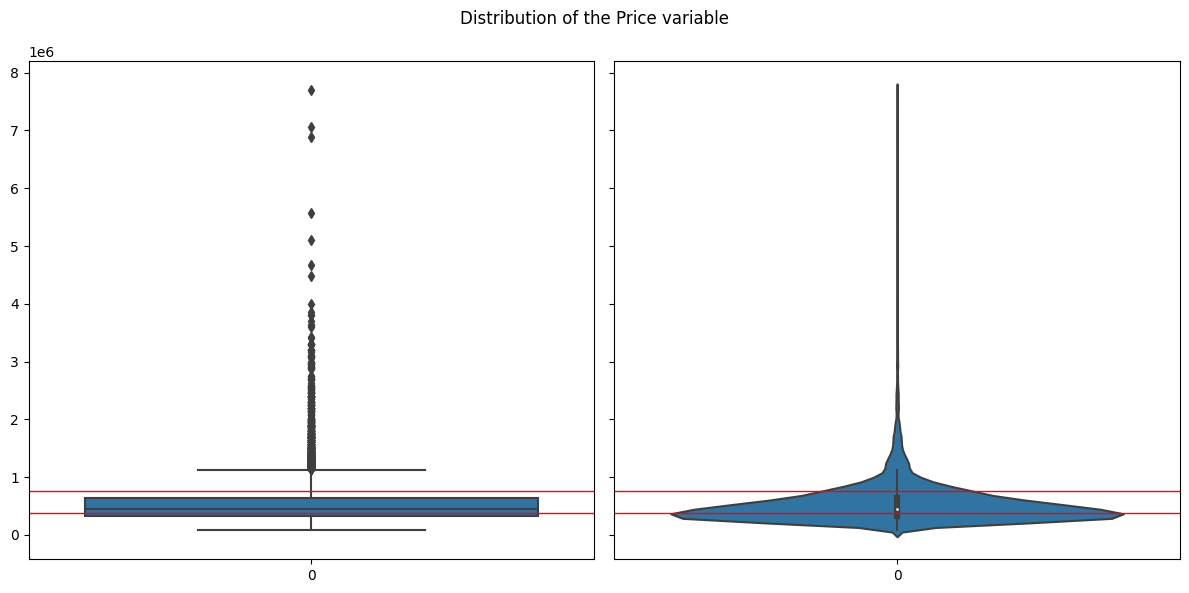

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.suptitle("Distribution of the Price variable")

sns.boxplot(data=houses_df["Price"], ax=axes[0])
sns.violinplot(data=houses_df["Price"], ax=axes[1])
axes[0].axhline(y=threshold1, color='red', linestyle='-', linewidth=1)
axes[1].axhline(y=threshold1, color='red', linestyle='-', linewidth=1)
axes[0].axhline(y=threshold2, color='red', linestyle='-', linewidth=1)
axes[1].axhline(y=threshold2, color='red', linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()

In [63]:
labels = ["Cheap", "Medium", "Expensive"]
bins = [-float("inf"), threshold1, threshold2, float("inf")]
houses_df["price_category"] = pd.cut(houses_df["Price"], bins=bins, labels=labels, include_lowest=True)

houses_df.head(10)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,price_category
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,0,122003,52.8645,-114.557,2880,5400,2,58,2380000,Expensive
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,0,122004,52.8878,-114.470,2470,4000,2,51,1400000,Expensive
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,0,122004,52.8852,-114.468,2940,6600,1,53,1200000,Expensive
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,0,122005,52.9532,-114.321,3350,42847,3,76,838000,Expensive
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,0,122006,52.9047,-114.485,2060,4500,1,51,805000,Expensive
5,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,0,122007,52.9133,-114.590,2380,4750,1,67,790000,Expensive
6,6762813157,42491,5,3.25,3660,11995,2.0,0,2,3,...,0,122008,52.7637,-114.050,3320,11241,3,72,785000,Expensive
7,6762813599,42491,3,1.75,2240,10578,2.0,0,0,5,...,0,122006,52.9254,-114.482,1570,10578,3,71,750000,Medium
8,6762813600,42491,3,2.50,2390,6550,1.0,0,2,4,...,0,122009,52.8014,-114.598,2010,6550,1,73,750000,Medium
9,6762814461,42491,4,2.25,2200,11250,1.5,0,0,5,...,0,122010,52.9145,-114.391,2320,10814,2,53,698000,Medium


In [65]:
category_counts = houses_df['price_category'].value_counts()
print(category_counts)
print()
houses_df.info()


price_category
Medium       6912
Cheap        5307
Expensive    2401
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     14620 non-null  int64   
 1   Date                                   14620 non-null  int64   
 2   number of bedrooms                     14620 non-null  int64   
 3   number of bathrooms                    14620 non-null  float64 
 4   living area                            14620 non-null  int64   
 5   lot area                               14620 non-null  int64   
 6   number of floors                       14620 non-null  float64 
 7   waterfront present                     14620 non-null  int64   
 8   number of views                        14620 non-null  int64   
 9   condition of the house         

<AxesSubplot: xlabel='price_category'>

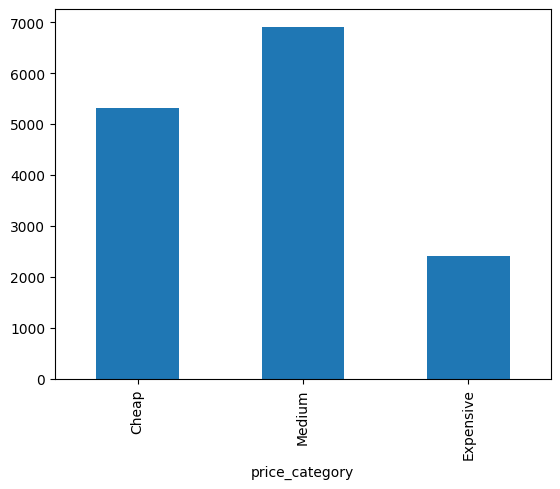

In [70]:
category_order = ["Cheap", "Medium", "Expensive"]
pd.Series(houses_df["price_category"]).value_counts().loc[category_order].plot(kind="bar")

<AxesSubplot: xlabel='id', ylabel='Price'>

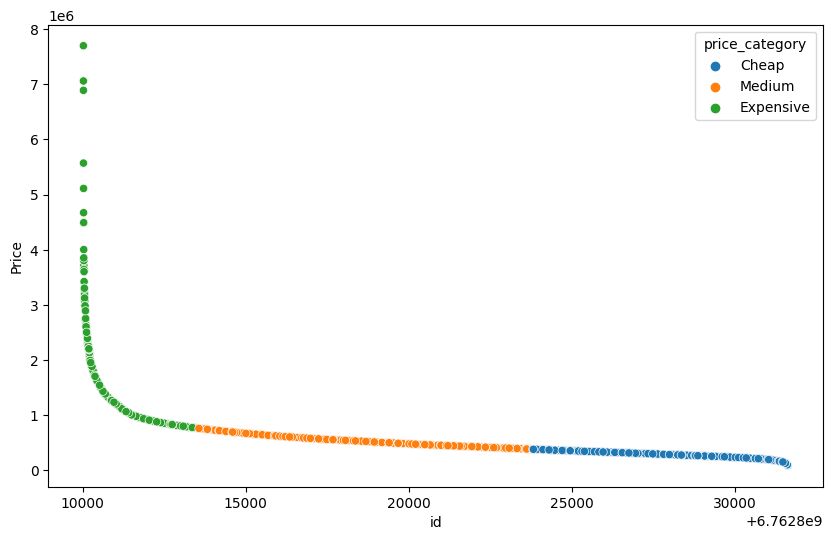

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=houses_df, x="id", y="Price", hue="price_category")

Podział na zbiory

In [83]:
from sklearn.model_selection import train_test_split
y = np.array(houses_df['price_category'])
X = houses_df.drop(['price_category'],axis=1)

X_used, X_test, y_used, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_used, y_used, stratify=y_used, test_size=1/8, random_state=42
)

y_used = pd.DataFrame(y_used, columns=['price_category'])

print(f"all data: {X.shape}\nused in the training process: {X_used.shape}\nused for training: {X_train.shape}\nused for validation: {X_val.shape}\nused for final testing: {X_test.shape}")

train_df = X_train
train_df["price_category"] = pd.cut(train_df["Price"], bins=bins, labels=labels, include_lowest=True)

all data: (14620, 23)
used in the training process: (11696, 23)
used for training: (10234, 23)
used for validation: (1462, 23)
used for final testing: (2924, 23)


<AxesSubplot: >

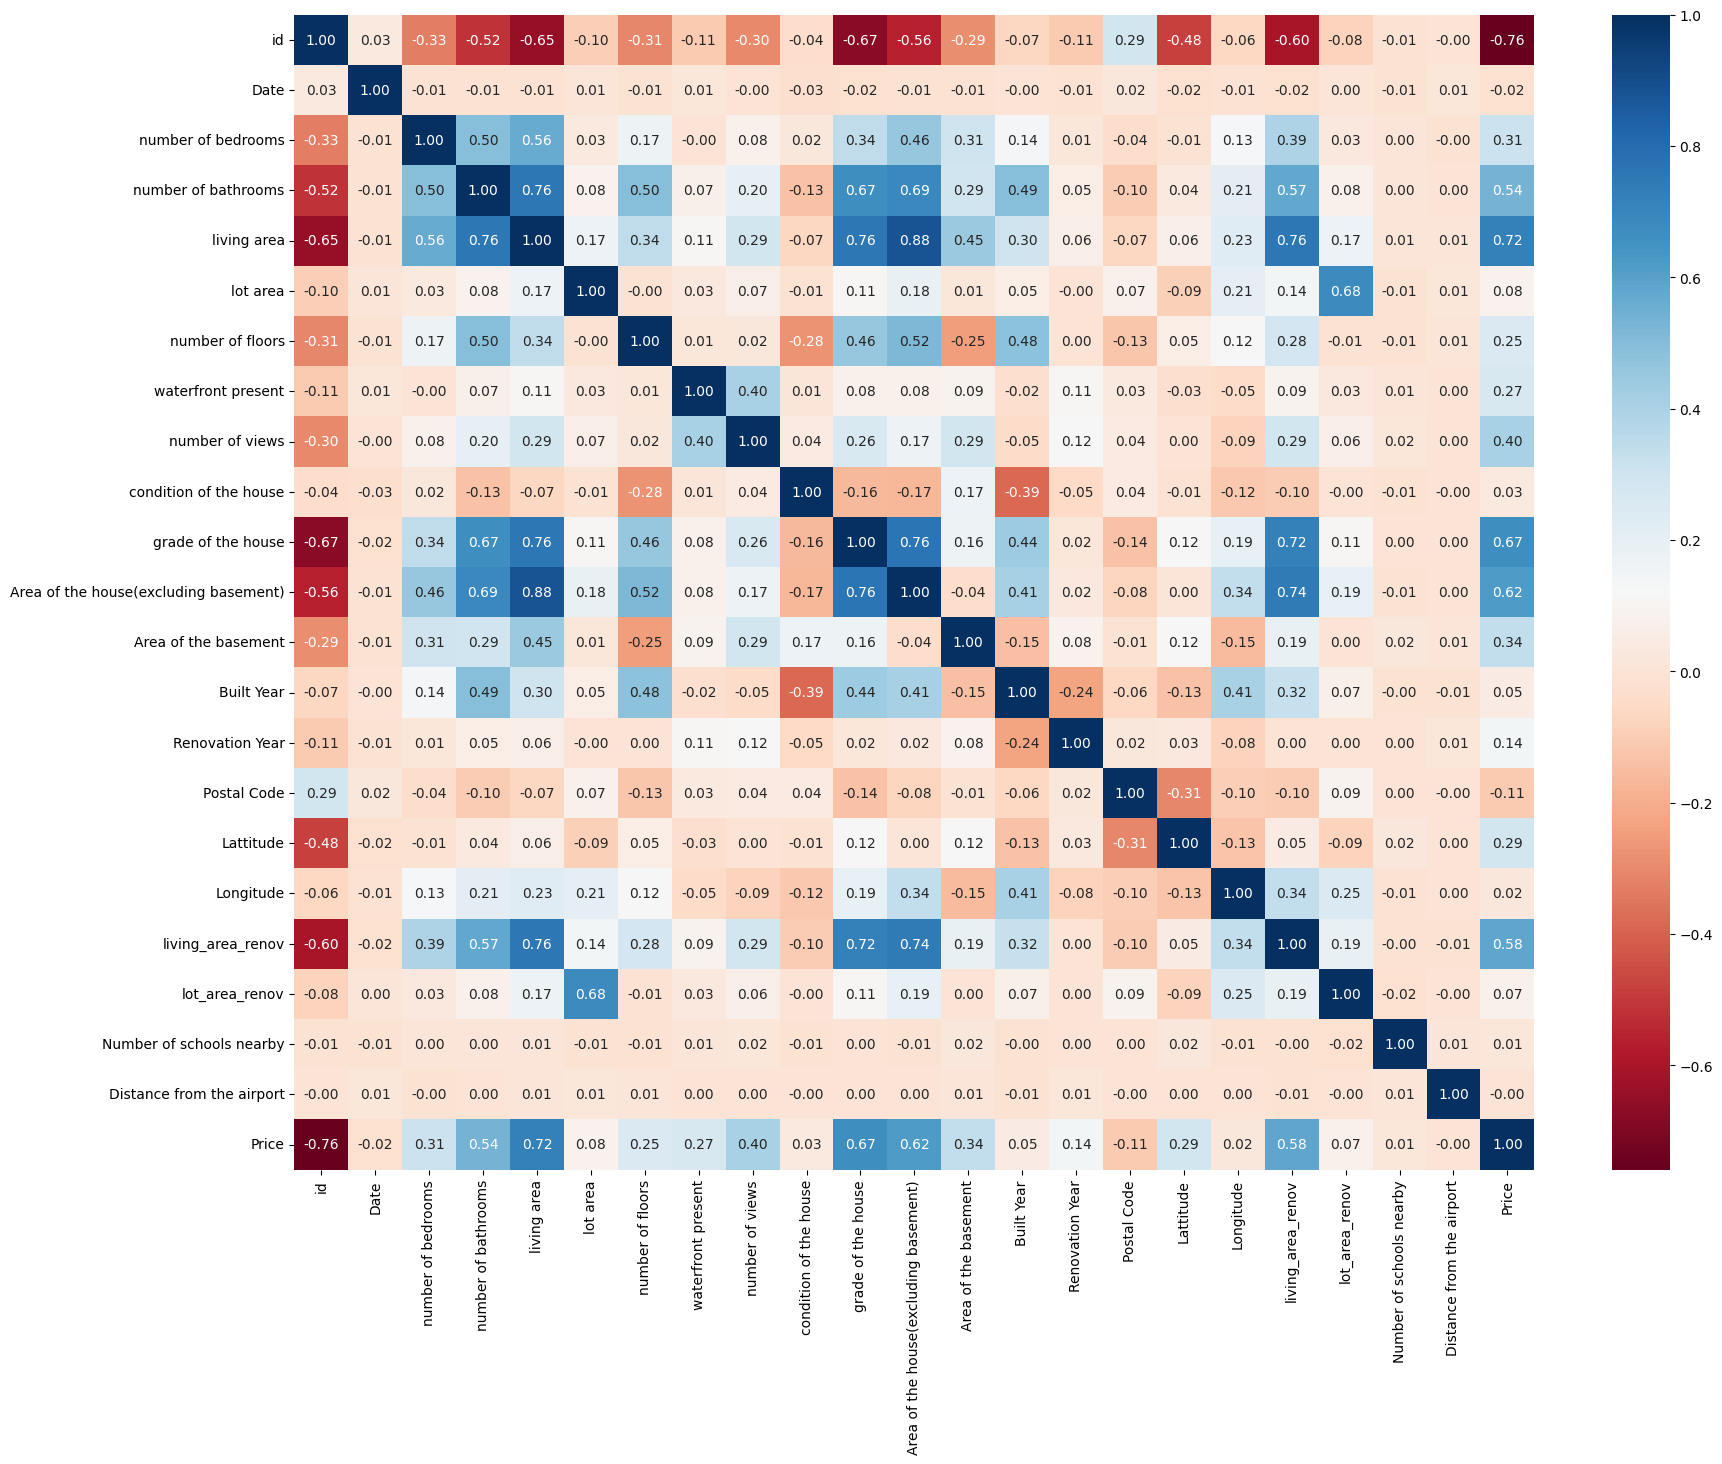

In [84]:
num_cols = train_df.select_dtypes(include=np.number).columns.to_list()
corr = train_df[num_cols].corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu")

c:\Users\kornel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\kornel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\kornel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to ret

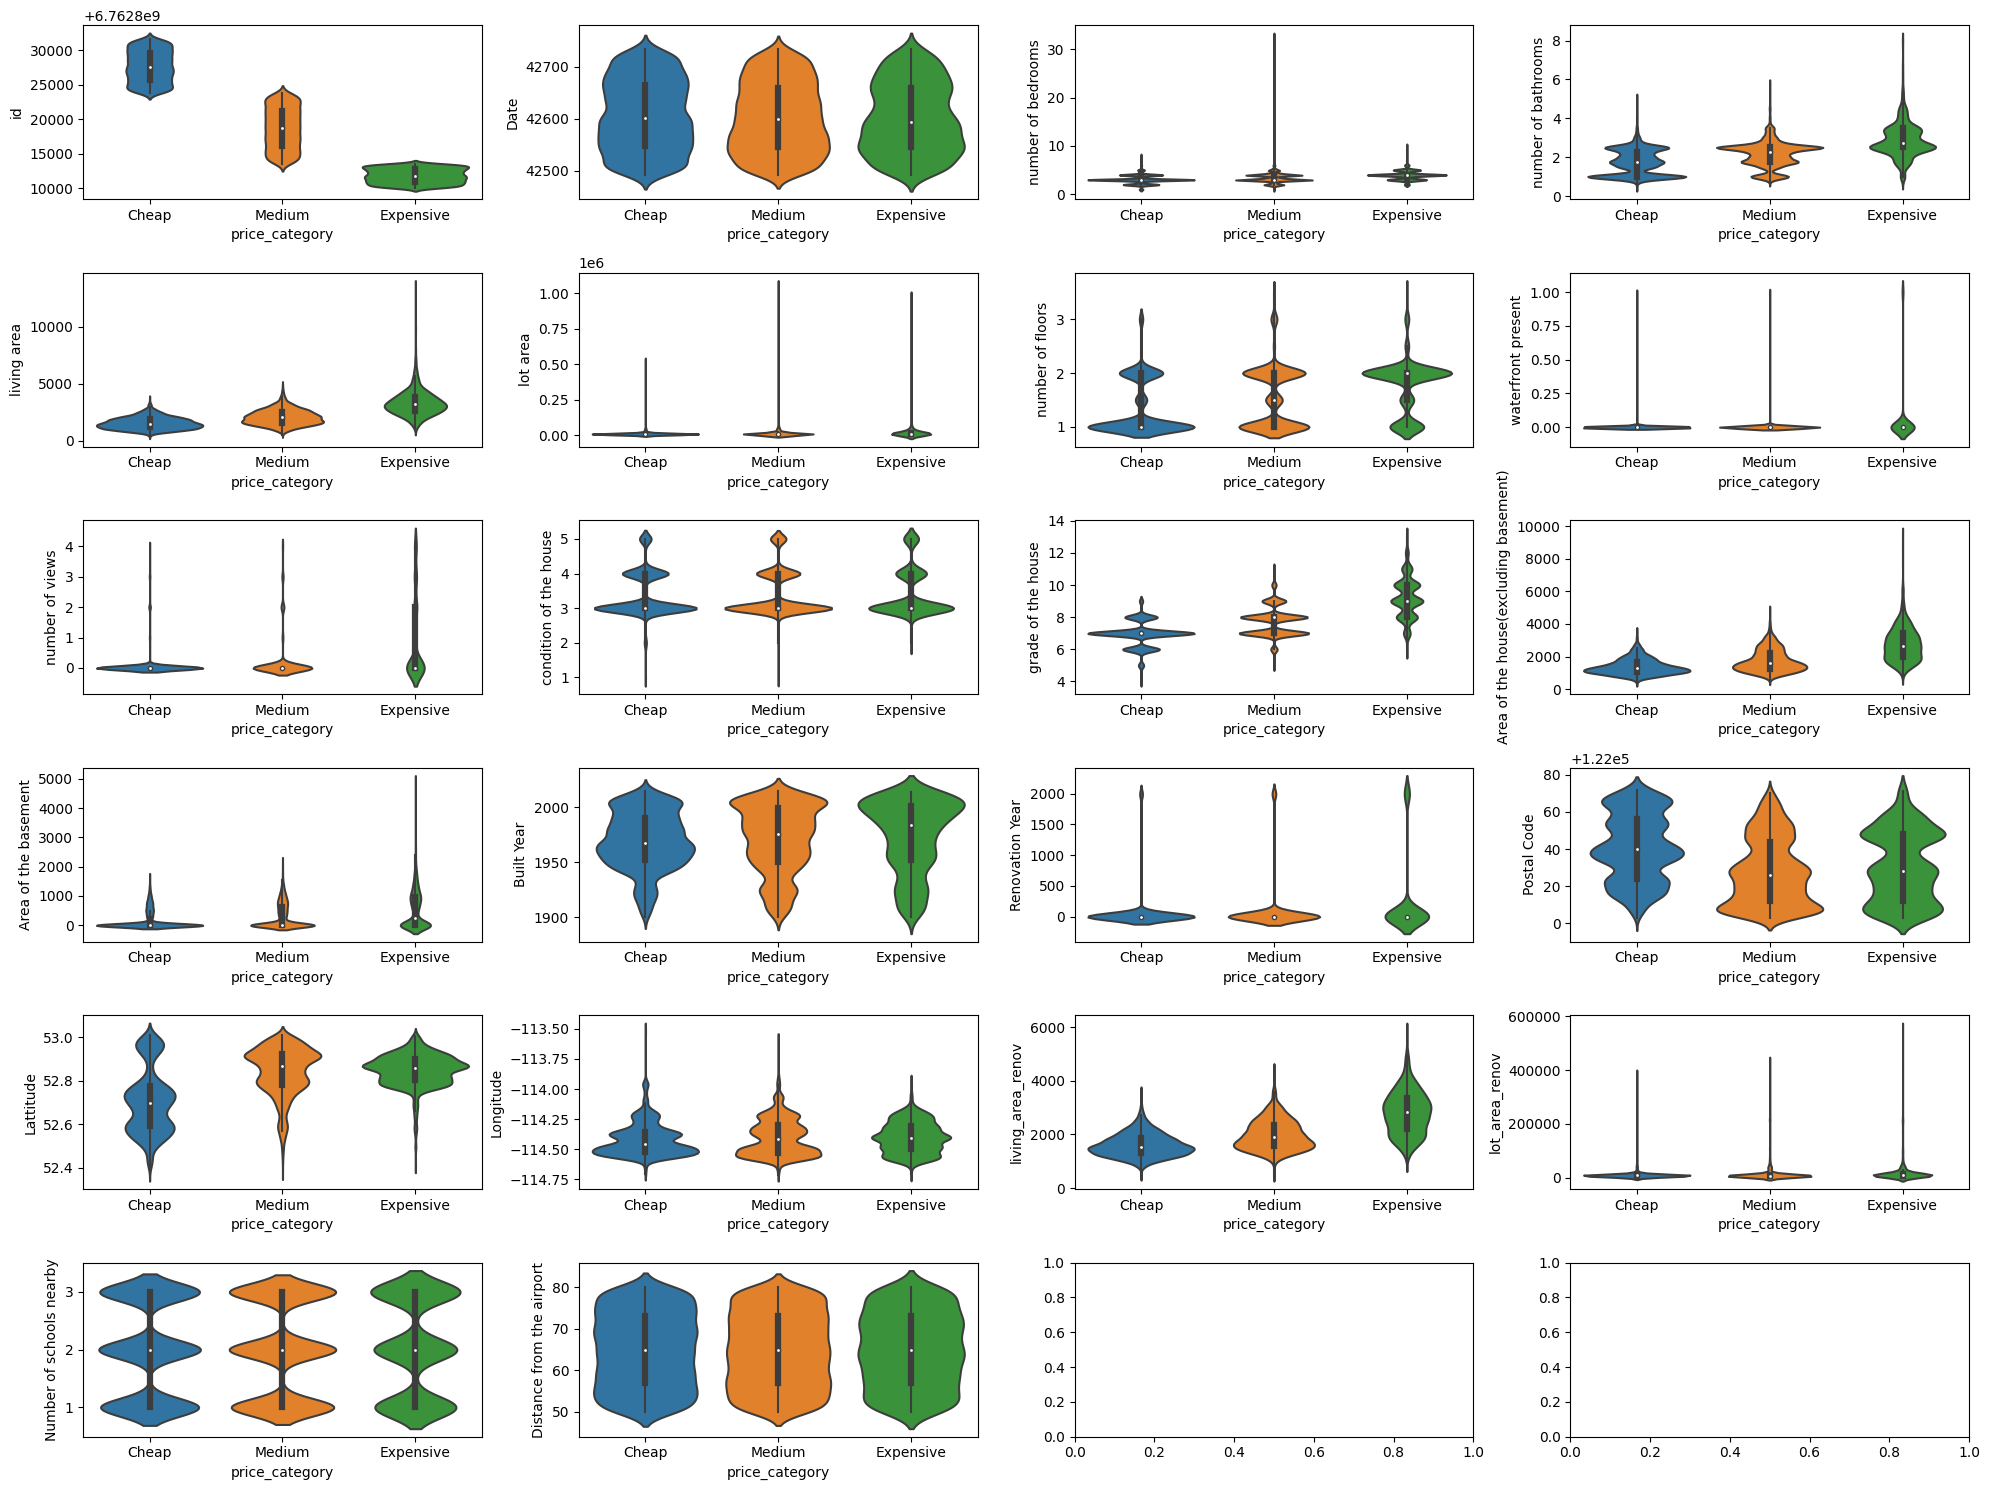

In [85]:
fig, axs = plt.subplots(6,4, figsize=(20,15))
axs = axs.flatten()
for i,col in enumerate(train_df.columns[0:22]):
    sns.violinplot(data=train_df, x=train_df["price_category"], y=col, ax=axs[i])
plt.tight_layout()

c:\Users\kornel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kornel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kornel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kornel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWar

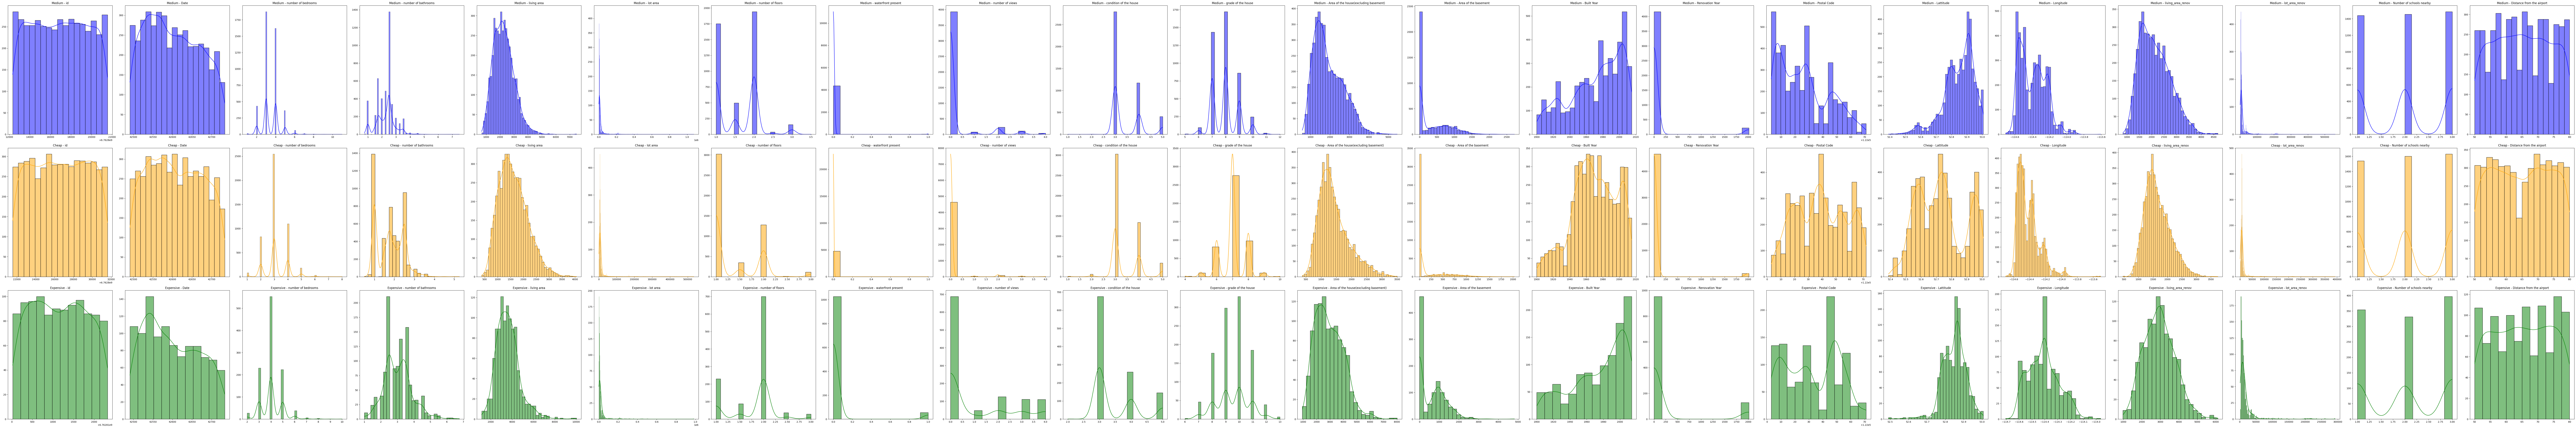

In [16]:
classes = train_df['price_category'].unique()
fig, axs = plt.subplots(3, 22, figsize=(150, 25))
colors=['blue', 'orange', 'green']
for i, clazz in enumerate(classes):
    for j, col in enumerate(train_df.columns[0:22]):
        sns.histplot(train_df[train_df['price_category'] == clazz][col], ax=axs[i, j], color=colors[i], label=clazz, kde=True)
        axs[i, j].set_title(f'{clazz} - {col}')
        axs[i, j].set_xlabel('')
        axs[i, j].set_ylabel('')
        axs[i, j].legend().remove()

axs = axs.flatten()
plt.tight_layout()

In [17]:
sns.pairplot(data=houses_df, hue="price_category")
plt.figure(figsize=(30, 30))

c:\Users\kornel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kornel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\kornel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kornel\AppData\Local\Programs\

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000021FEC415F30> (for post_execute):


KeyboardInterrupt: 